**Great Learning - Project 1 - Applied Statistics**


*Data* *Description:*

> The data at hand contains medical costs of people characterized by certain attributes.

*Domain:*

> Healthcare

*Context:*

> Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.

*Attribute Information:*

*age:* age of primary beneficiary

*sex:* insurance contractor gender, female, male

*bmi:* Body mass index, providing an understanding of body,
weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of
height to weight, ideally 18.5 to 24.9

*children:* Number of children covered by health insurance /
Number of dependents

*smoker:* Smoking

*region:* the beneficiary's residential area in the US, northeast,
southeast, southwest, northwest.

*charges:* Individual medical costs billed by health insurance.

*Objective:*
> ● Exploratory Data Analysis
> ● Practicing statistics using Python
> ● Hypothesis testing








In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.Import the necessary libraries**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import gc

%matplotlib inline

**2.Read the data as a data frame**

In [0]:
df = pd.read_csv("/content/drive/My Drive/Machine Learning/Great Learning/insurance (2).csv")

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**3.Perform basic EDA**
>a. Shape of the data

In [0]:
df.shape

(1338, 7)

1338 rows and 7 columns in the dataset

>b. Data type of each attribute

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


sex, smoker, region are categorical data

age, bmi, children, charges are numerivcal data

>c. Checking the presence of missing values

In [0]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values in the dataset

>d. 5 point summary of numerical attributes

In [0]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


>e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

**BMI**

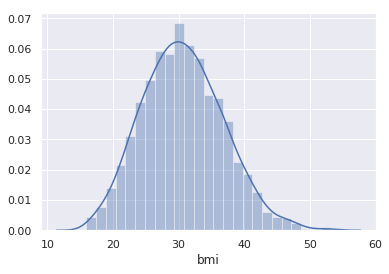

In [0]:
sns.distplot(df['bmi'])

From the visual representation of bmi distribution, it is observed that the data looks normal, however, we need to further confirm this with statistical validation

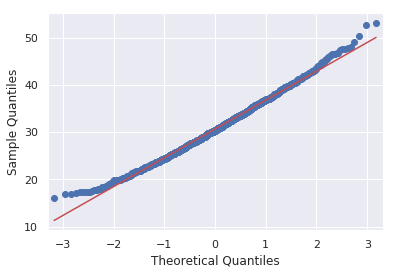

In [0]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['bmi'], line='s')
pyplot.show()

In [0]:
import scipy as scipy
scipy.stats.normaltest(df['bmi'], axis=0)

NormaltestResult(statistic=17.581447872784118, pvalue=0.0001521377897266011)

From the normality tests, P-Value is less than 0.05 (significance level). Hence concluding that bmi does not follow normal distribution

**Age**

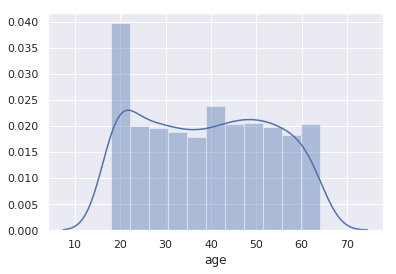

In [0]:
sns.distplot(df['age'])

Distribution plot clearly indicates the age data is not normal. Let's further confirm this with Normality test

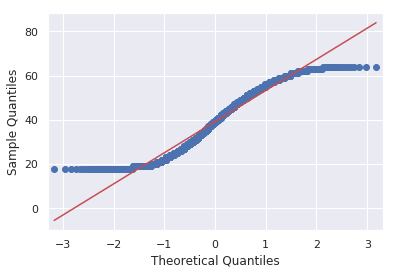

In [0]:
qqplot(df['age'], line='s')
pyplot.show()

In [0]:
import scipy as scipy
scipy.stats.normaltest(df['age'], axis=0)

NormaltestResult(statistic=1557.8205812363667, pvalue=0.0)

With the Normality test, confirming the age data is not normal, as P-Value is less than 0.05

**Charges**

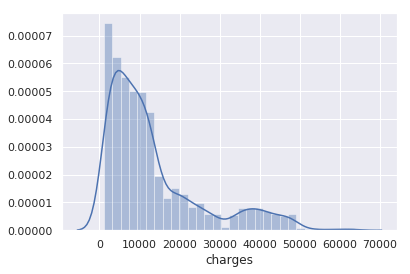

In [0]:
sns.distplot(df['charges'])

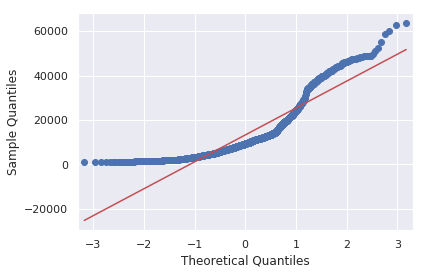

In [0]:
qqplot(df['charges'], line='s')
pyplot.show()

In [0]:
import scipy as scipy
scipy.stats.normaltest(df['charges'], axis=0)

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

Confirming that the charges data is not normal, as P-Value is less than 0.05

> f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [0]:
print("Skewness in BMI values: ", scipy.stats.skew(df['bmi'], axis=0, bias=True))
print("Skewness in Age values: ", scipy.stats.skew(df['age'], axis=0, bias=True))
print("Skewness in Charges values: ", scipy.stats.skew(df['charges'], axis=0, bias=True))

Skewness in BMI values:  0.28372857291709386
Skewness in Age values:  0.055610083072599126
Skewness in Charges values:  1.5141797118745743


**Skewness** is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

Positive skew of the variables indicate that the right tail is longer or right skewed data


> g. Checking the presence of outliers in ‘bmi’, ‘age’ and
‘charges columns


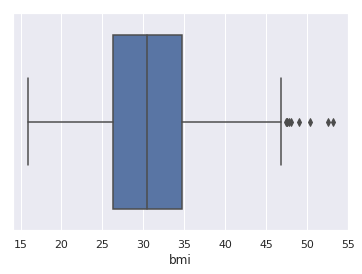

In [0]:
sns.boxplot(x="bmi", data=df)

Outliers observed in bmi column

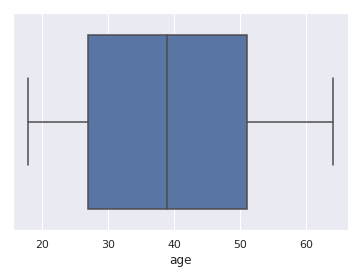

In [0]:
sns.boxplot(x="age", data=df)

No outliers observed in age column

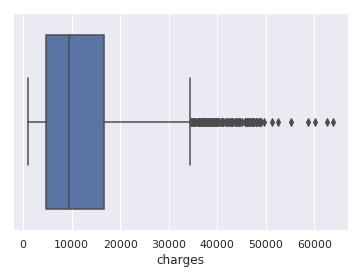

In [0]:
sns.boxplot(x="charges", data=df)

Outliers observed in charges column

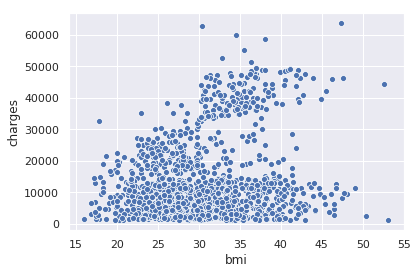

In [0]:
sns.scatterplot(x="bmi", y="charges", data=df)

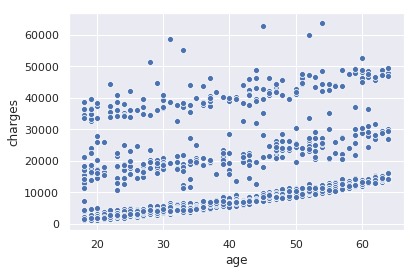

In [0]:
sns.scatterplot(x="age", y="charges", data=df)

>Distribution of categorical columns (include children)

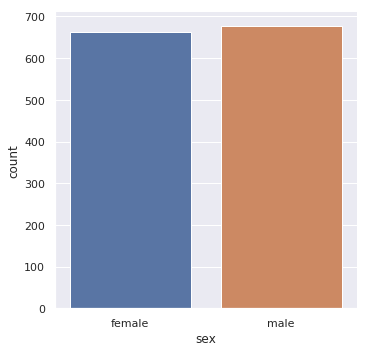

In [0]:
sns.catplot(x="sex", kind="count", data=df);

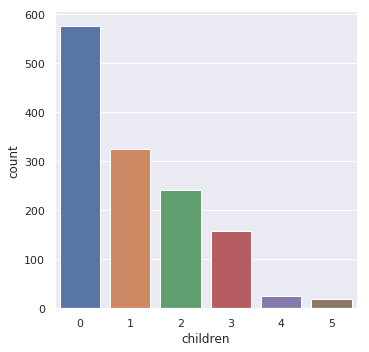

In [0]:
sns.catplot(x="children", kind="count", data=df);

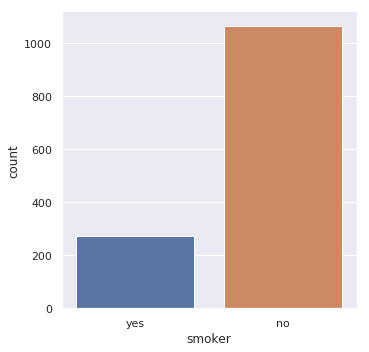

In [0]:
sns.catplot(x="smoker", kind="count", data=df);

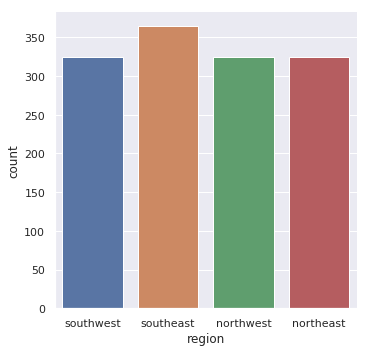

In [0]:
sns.catplot(x="region", kind="count", data=df);

>i. Pair plot that includes all the columns of the data frame

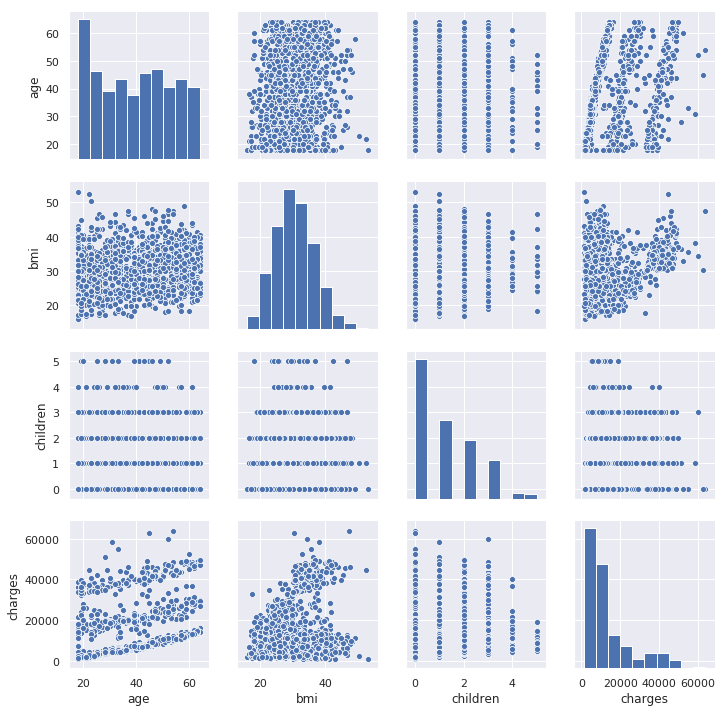

In [0]:
sns.pairplot(df)

***4. Answer the following questions with statistical evidence***

>a. Do charges of people who smoke differ significantly from the people who don't?

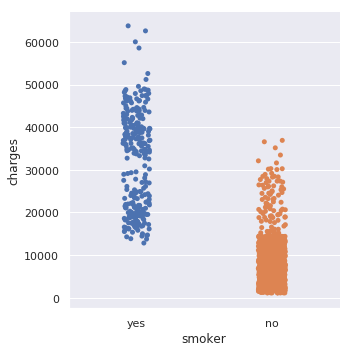

In [0]:
sns.catplot(x="smoker", y="charges", order=["yes", "no"], data=df);

It is evident from the plot that, charges for smokers is higher compared to non-smokers. To be confirmed futher with statistical evidences

In [0]:
df1 = df[df.smoker == "yes"]
charges_for_smoker = df1['charges']
df2 = df[df.smoker == "no"]
charges_for_nonsmoker = df2['charges']

Since charges variable is not normal, going with Test of medians i.e Mann-Whitney test

Ho: Median charges for smorkers & non-smokers are equal

H1: Median charges for smorkers & non-smokers are not equal

In [0]:
print("Median charges for Smokers: ", charges_for_smoker.median())
print("Median charges for Non-Smokers: ", charges_for_nonsmoker.median())

Median charges for Smokers:  34456.348450000005
Median charges for Non-Smokers:  7345.4053


In [0]:
scipy.stats.mannwhitneyu(charges_for_smoker, charges_for_nonsmoker, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

Since P-value is less than 0.05, Charges for Smokers is significantly different than Non-Smokers i.e chargers for smokers is higher

>b. Does bmi of males differ significantly from that of females?


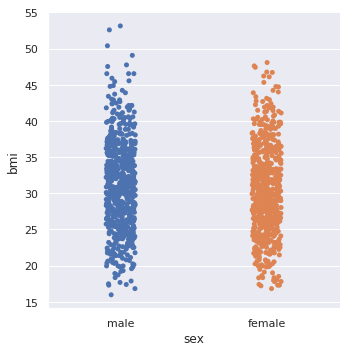

In [0]:
sns.catplot(x="sex", y="bmi", order=["male", "female"], data=df);

Observed from the plot, there is no big difference in the bmi of male & female. However this to be confirmed with statistical validation.

Since bmi does not follow normal distribution, going with Test of medians i.e Mann-whitney test

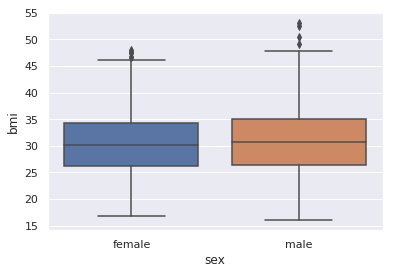

In [0]:
sns.boxplot(x="sex", y="bmi", data=df);

In [0]:
df3 = df[df.sex == "male"]
bmi_male = df3['bmi']
df4 = df[df.sex == "female"]
bmi_female = df4['bmi']

Ho: Median bmi for male & female are equal

H1: Median bmi for male & female are not equal

In [0]:
print("Median bmi for male: ", bmi_male.median())
print("Median bmi for female: ", bmi_female.median())

Median bmi for male:  30.6875
Median bmi for female:  30.1075


In [0]:
scipy.stats.mannwhitneyu(bmi_male, bmi_female, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=212180.0, pvalue=0.05070064020142721)

Since P-value is greater than 0.05, there is no significant difference in bmi for males and females

>c. Is the proportion of smokers significantly different in different genders?


In [0]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1]
n_females = df.sex.value_counts()[1]
n_males = df.sex.value_counts()[0]

In [0]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [0]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant i.e the proportion of smokers in males is significantly higher')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant')

With a p-value of 0.0053 the difference is significant i.e the proportion of smokers in males is significantly higher


>d. Is the distribution of bmi across women with no children, one child and two children, the same ?


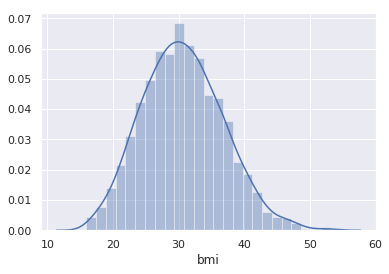

In [0]:
sns.distplot(df['bmi']);

In [0]:
options = ['0']
female_0c_bmi = df[(df['sex'] == "female") & df['children'].isin(options)] 

In [0]:
options = ['1']
female_1c_bmi = df[(df['sex'] == "female") & df['children'].isin(options)] 

In [0]:
options = ['2']
female_2c_bmi = df[(df['sex'] == "female") & df['children'].isin(options)] 

In [0]:
import matplotlib.pyplot as plt
sns.set()

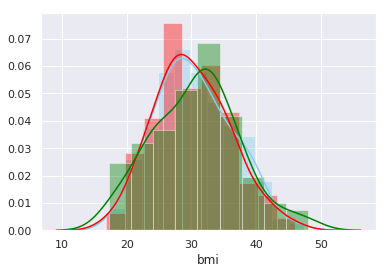

In [0]:
sns.distplot( female_0c_bmi["bmi"] , color="skyblue")
sns.distplot( female_1c_bmi["bmi"] , color="red")
sns.distplot( female_2c_bmi["bmi"] , color="green")
plt.show()


In [0]:
print("Skewness in bmi of female with no children: ", scipy.stats.skew(female_0c_bmi['bmi'], axis=0, bias=True))
print("Skewness in bmi of female with 1 child    : ", scipy.stats.skew(female_1c_bmi['bmi'], axis=0, bias=True))
print("Skewness in bmi of female with 2 children : ", scipy.stats.skew(female_2c_bmi['bmi'], axis=0, bias=True))

Skewness in bmi of female with no children:  0.2507669979348794
Skewness in bmi of female with 1 child    :  0.2711482229097129
Skewness in bmi of female with 2 children :  0.16768286822433243


Observed that distribution of BMI for female with 0 & 1 children are almost closer and BMI for female with 2 children is slightly differ from other 2.